# DFT in Analize signalov

In [25]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def compute_dft_complex(signal, sample_rate, N, freq_resolution=0.5, threshold=0.002, batch_size=64):
    length = len(signal)
    time_points = np.arange(length) / sample_rate
    freqs = np.arange(0, N + freq_resolution, freq_resolution)

    filtered_freqs = []
    filtered_amplitudes = []

    # Obdelujemo v batchih
    for i in range(0, len(freqs), batch_size):
        batch_freqs = freqs[i: i + batch_size]
        basis_matrix = np.exp(-2j * np.pi * batch_freqs[:, None] * time_points)
        coeffs = np.dot(basis_matrix, signal)
        batch_amplitudes = 2 * np.abs(coeffs) / length  # normalizacija

        mask = batch_amplitudes >= threshold
        filtered_freqs.append(batch_freqs[mask])
        filtered_amplitudes.append(batch_amplitudes[mask])

    # Združimo rezultate iz vseh batchov
    if filtered_freqs:
        freqs_filtered = np.concatenate(filtered_freqs)
        amplitudes_filtered = np.concatenate(filtered_amplitudes)
    else:
        freqs_filtered = np.array([])
        amplitudes_filtered = np.array([])

    return freqs_filtered, amplitudes_filtered


In [27]:
def plot_dft_amplitudes(freqs, amplitudes, title="DFT Amplitudes"):
    plt.figure(figsize=(10, 5))
    plt.plot(freqs, amplitudes)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [28]:
rpm_data = [
    {"filename": "sig_a_1.wav", "blades": 10, "rpm_range": (1100, 1600)},
    {"filename": "sig_b_1.wav", "blades": 5, "rpm_range": (2200, 2800)},
    {"filename": "sig_c_1.wav", "blades": 3, "rpm_range": (400, 900)},
    {"filename": "sig_c_2.wav", "blades": 3, "rpm_range": (800, 1400)},
    {"filename": "sig_c_3.wav", "blades": 3, "rpm_range": (2200, 2950)},
    {"filename": "sig_c_4.wav", "blades": 3, "rpm_range": (1950, 2400)},
    {"filename": "sig_c_5.wav", "blades": 3, "rpm_range": (1300, 1600)},
    {"filename": "sig_c_6.wav", "blades": 3, "rpm_range": (1900, 2300)},
    {"filename": "sig_c_7.wav", "blades": 3, "rpm_range": (1700, 2000)},
]

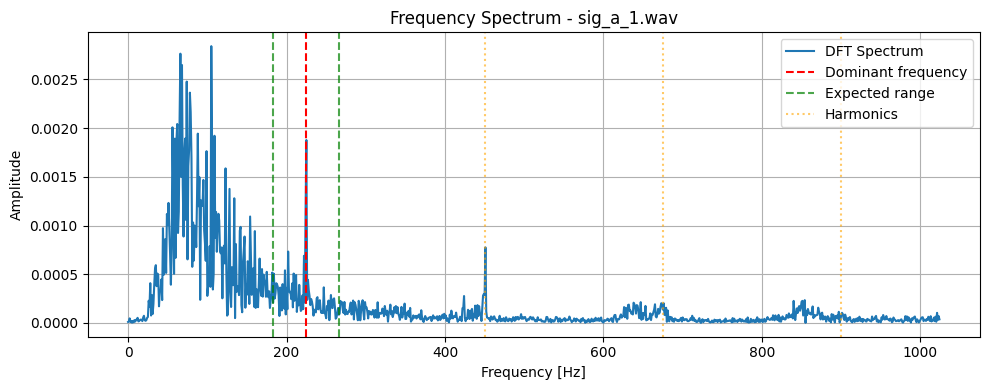

Processed file: sig_a_1.wav
Dominant frequency: 225.0 Hz | Detected RPM: 1350.0 RPM


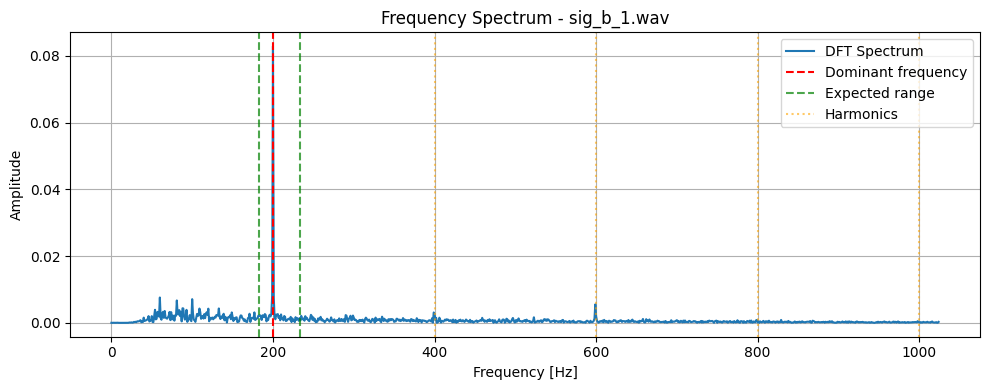

Processed file: sig_b_1.wav
Dominant frequency: 200.0 Hz | Detected RPM: 2400.0 RPM


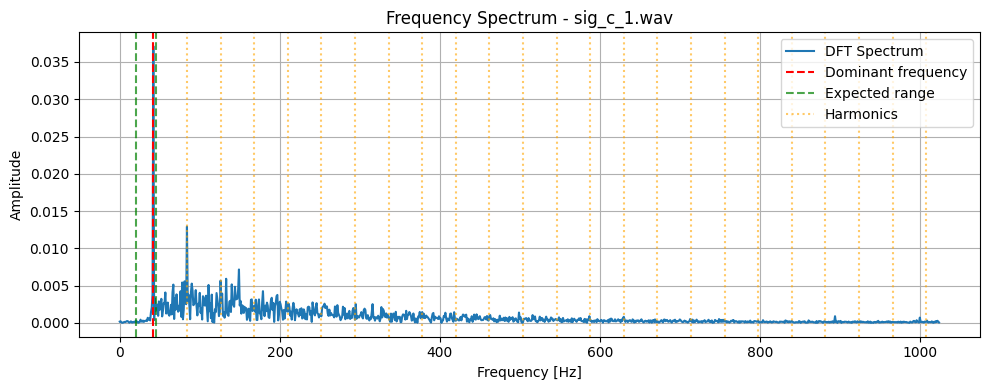

Processed file: sig_c_1.wav
Dominant frequency: 42.0 Hz | Detected RPM: 840.0 RPM


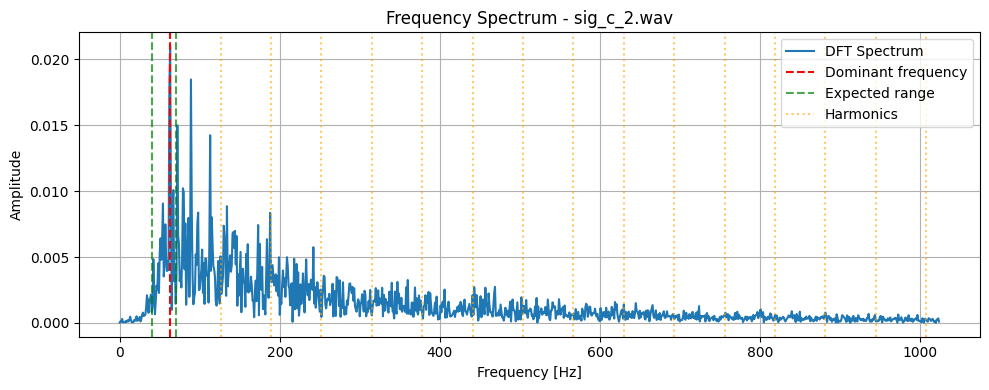

Processed file: sig_c_2.wav
Dominant frequency: 63.0 Hz | Detected RPM: 1260.0 RPM


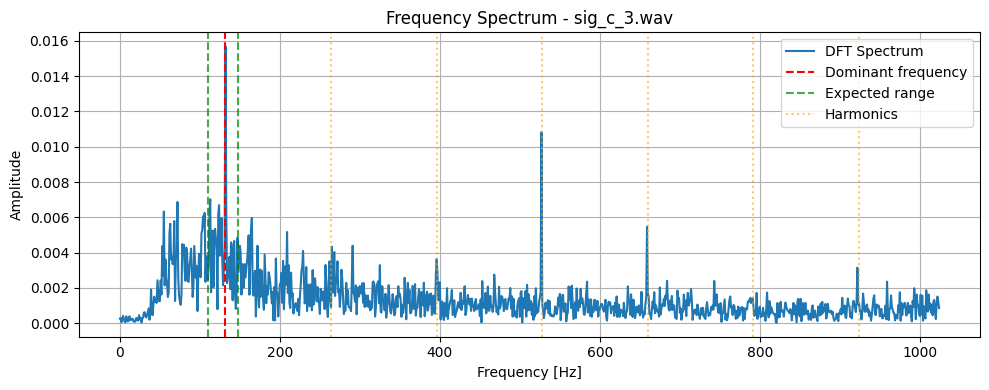

Processed file: sig_c_3.wav
Dominant frequency: 132.0 Hz | Detected RPM: 2640.0 RPM


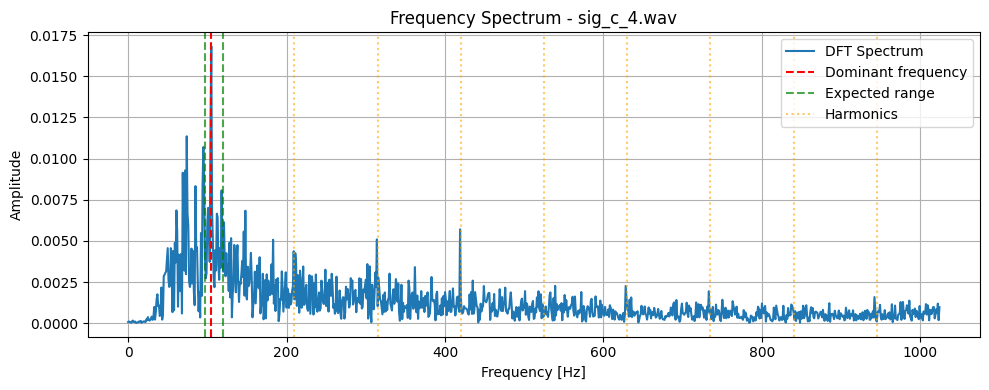

Processed file: sig_c_4.wav
Dominant frequency: 105.0 Hz | Detected RPM: 2100.0 RPM


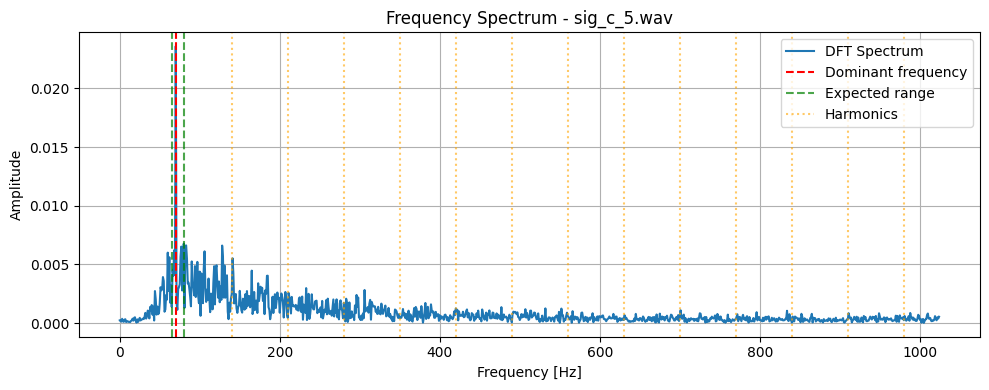

Processed file: sig_c_5.wav
Dominant frequency: 70.0 Hz | Detected RPM: 1400.0 RPM


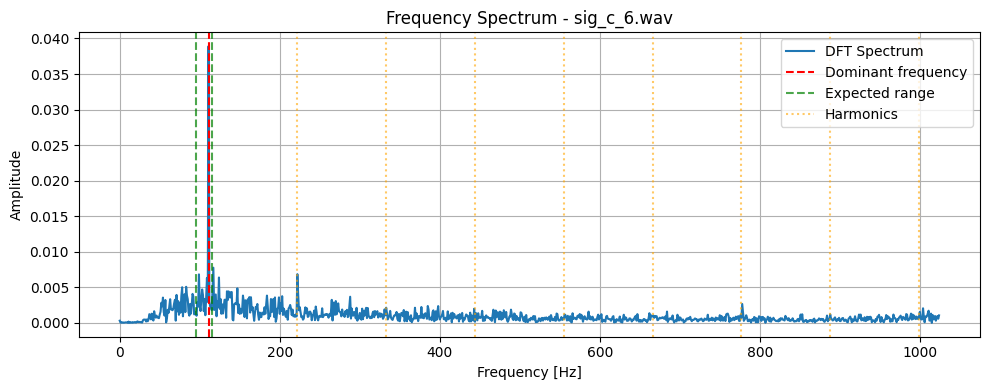

Processed file: sig_c_6.wav
Dominant frequency: 111.0 Hz | Detected RPM: 2220.0 RPM


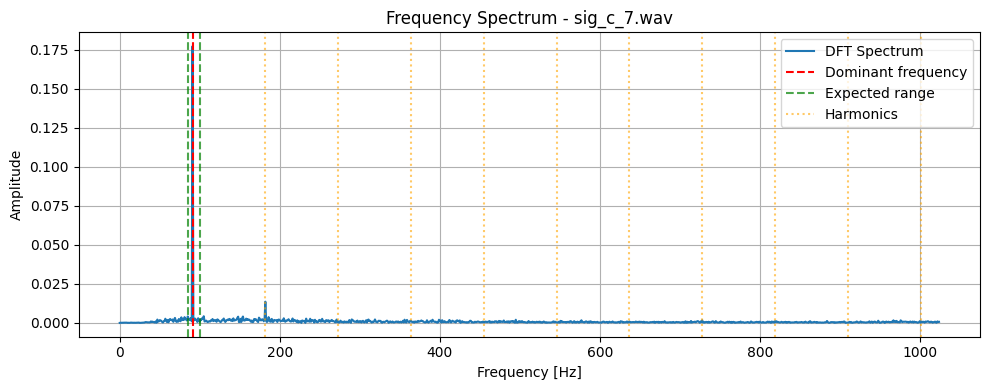

Processed file: sig_c_7.wav
Dominant frequency: 91.0 Hz | Detected RPM: 1820.0 RPM


In [29]:
import os

def procesiraj_posketke():
    N = 1024
    folder = 'rpm'
    for entry in rpm_data:
        filename, blades, rpm_range = entry['filename'], entry['blades'], entry['rpm_range']
        filepath = os.path.join(folder, filename)
        sample_rate, signal = read(filepath)
        y = (signal / np.max(np.abs(signal))).astype(np.float32)

        freqs, amplitudes = compute_dft_complex(y, sample_rate, N, freq_resolution=1, threshold=0.0)

        freq_range = (rpm_range[0] * blades) / 60, (rpm_range[1] * blades) / 60
        mask = (freqs >= freq_range[0]) & (freqs <= freq_range[1])
        dominant_freq = freqs[mask][np.argmax(amplitudes[mask])]
        rpm = 60 * dominant_freq / blades
        harmonics = dominant_freq * np.arange(2, int(N // dominant_freq) + 1)

        plt.figure(figsize=(10, 4))
        plt.plot(freqs, amplitudes, label='DFT Spectrum')
        plt.axvline(dominant_freq, color='red', linestyle='--', label=f'Dominant frequency')

        plt.axvline(freq_range[0], color='green', linestyle='--', alpha=0.7, label='Expected range')
        plt.axvline(freq_range[1], color='green', linestyle='--', alpha=0.7)

        for i, h in enumerate(harmonics):
            label = 'Harmonics' if i == 0 else None
            plt.axvline(h, color='orange', linestyle=':', alpha=0.6, label=label)

        plt.title(f"Frequency Spectrum - {filename}")
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.tight_layout()
        plt.grid(True)
        plt.show()

        print(f"Processed file: {filename}\nDominant frequency: {dominant_freq:.1f} Hz | Detected RPM: {rpm} RPM")


procesiraj_posketke()